# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

#### Trying to get Google API working

In [12]:
from googleapiclient.discovery import build
from httplib2 import Http
from oauth2client import file, client, tools

In [11]:
import pickle
import gzip
import json
from pprint import pprint

# returns my GOOGLE API keys
with gzip.open('/nfshome/shy256/fall18/PUI/PUI2018/HW9_shy256/.google_api_cli_key.bin', 'rb') as f:
    __GOOGLE_API_CLI__ = json.loads(pickle.load(f))

__GOOGLE_API_CLI__

{'installed': {'auth_provider_x509_cert_url': 'https://www.googleapis.com/oauth2/v1/certs',
  'auth_uri': 'https://accounts.google.com/o/oauth2/auth',
  'client_id': '565675958472-gqp4bdmc1mc7ecu5hrsak6gdeijbarsa.apps.googleusercontent.com',
  'client_secret': '6biEpnLjdohvcGilHMcFLONZ',
  'project_id': 'hip-phoenix-166712',
  'redirect_uris': ['urn:ietf:wg:oauth:2.0:oob', 'http://localhost'],
  'token_uri': 'https://www.googleapis.com/oauth2/v3/token'}}

In [15]:
# If modifying these scopes, delete the file token.json.
SCOPES = 'https://www.googleapis.com/auth/drive.metadata.readonly'

"""Shows basic usage of the Drive v3 API.
Prints the names and ids of the first 10 files the user has access to.
"""
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
store = file.Storage('token.json')
creds = store.get()
if not creds or creds.invalid:
    flow = client.flow_from_clientsecrets('credential.json', SCOPES)
    creds = tools.run_flow(flow, store)
service = build('drive', 'v3', http=creds.authorize(Http()))

# Call the Drive v3 API
results = service.files().list(
    pageSize=10, fields="nextPageToken, files(id, name)").execute()
items = results.get('files', [])

if not items:
    print('No files found.')
else:
    print('Files:')
    for item in items:
        print(u'{0} ({1})'.format(item['name'], item['id']))


usage: ipykernel_launcher.py [--auth_host_name AUTH_HOST_NAME]
                             [--noauth_local_webserver]
                             [--auth_host_port [AUTH_HOST_PORT [AUTH_HOST_PORT ...]]]
                             [--logging_level {DEBUG,INFO,WARNING,ERROR,CRITICAL}]
ipykernel_launcher.py: error: unrecognized arguments: -f /nfshome/shy256/.local/share/jupyter/runtime/kernel-215fe87c-9629-4439-a41d-40528fb82fd2.json


SystemExit: 2

/nfshome/shy256/.conda/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3273: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
file_id = '1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs'
request = drive_service.files().get_media(fileId=file_id)
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print "Download %d%%." % int(status.progress() * 100)

{
 "error": {
  "errors": [
   {
    "domain": "usageLimits",
    "reason": "dailyLimitExceededUnreg",
    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",
    "extendedHelp": "https://code.google.com/apis/console"
   }
  ],
  "code": 403,
  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."
 }
}


In [212]:
from __future__ import print_function
# this is me
__author__ = "Sung Hoon Yang, CUSP NYU 2018"

# limit the number of same warnings to once
import warnings
warnings.filterwarnings(action='once')

## bread and butter
import sys
import numpy as np
import pandas as pd
import matplotlib
font = {'weight' : 'bold',
        'size'   : 88}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import os
"""
Set up PUIDATA env var
"""
os.environ["PUIDATA"] = "%s/fall18/PUI/PUIDATA"% os.getenv("HOME")
os.environ["PUI2018"] = "%s/fall18/PUI/PUI2018"% os.getenv("HOME")
%matplotlib inline
np.random.seed(999)

# Utilities
sys.path.insert(0, '/nfshome/shy256/util')
from puma_to_name import PUMA_TO_NAME
from pprint import pprint
import re
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from copy import deepcopy
import geopandas as gpd

In [20]:
!head "$fp"

Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
Albania,AL,CTS,65.9,56,1.76,70,8.6,270000
Algeria,DZ,CTS,4.8,20,0.06,78,7.6,1900000
Angola,AO,,,,,34,17.3,2800000
Anguilla,AI,WHO-MDB,24,1,7.14,,,
Argentina,AR,Ministry of Justice,52,1198,3.02,62,10.2,3950000
Armenia,AM,CTS,13,9,0.29,52,12.5,380000
Australia,AU,NSO,11.5,30,0.14,42,15,3050000
Austria,AT,CTS,29.5,18,0.22,14,30.4,2500000
Azerbaijan,AZ,CTS,6.5,11,0.12,115,3.5,290000


In [60]:
#### get data from ftp-ed file
__HW_DIR__ = os.path.join(os.getenv("PUIDATA"), 'HW9')
wfmao_fp = os.path.join(__HW_DIR__, 'wfmao.csv')
wfmao_df = pd.read_csv(wfmao_fp, sep=',')
wfmao_df.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


#### Acquiring Data; Number of mass shootings

In [57]:
_fp = "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78"

In [58]:
!curl -i -X GET "$_fp"; ls


curl: (1) Protocol "data" not supported or disabled in libcurl
Assignment2_inst.ipynb	  Assignment3_instructions-Copy1.ipynb	credential.json
Assignment2_shy256.ipynb  Assignment3_shy256.ipynb		README.md


In [48]:
!curl "$_fp"; ls

curl: (6) Could not resolve host: data
Assignment2_inst.ipynb	  Assignment3_instructions-Copy1.ipynb	credential.json
Assignment2_shy256.ipynb  Assignment3_shy256.ipynb		README.md


In [41]:
!cd "$__HW_DIR__"/pop_by_country; mkdir mass_shooting; cd mass_shooting; wget -O mass_shooting

API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
pop_by_country.zip


In [59]:
#### get data from ftp-ed file
__HW_DIR__ = os.path.join(os.getenv("PUIDATA"), 'HW9')
pvLFI_fp = os.path.join(__HW_DIR__, 'data-pvLFI.csv')
pvLFI_df = pd.read_csv(pvLFI_fp)
pvLFI_df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


#### Population by Country

In [40]:
!cd "$__HW_DIR__"; mkdir pop_by_country; cd pop_by_country; wget -O pop_by_country.zip http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv; unzip pop_by_country.zip;

--2018-11-13 22:31:25--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.36
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79717 (78K) [application/zip]
Saving to: ‘pop_by_country.zip’

pop_by_country.zip  100%[===================>]  77.85K  --.-KB/s    in 0.01s   

2018-11-13 22:31:25 (5.74 MB/s) - ‘pop_by_country.zip’ saved [79717/79717]

Archive:  pop_by_country.zip
  inflating: Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  


In [41]:
!cd "$__HW_DIR__"/pop_by_country; ls

API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
pop_by_country.zip


In [43]:
!cd "$__HW_DIR__"/pop_by_country;head "API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"

﻿"Data Source","World Development Indicators",

"Last Updated Date","2018-10-18",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",
"Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94992","97017","98737","100031","100832","101220","101353","1

In [44]:
!cd "$__HW_DIR__"/pop_by_country;head "Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"

﻿"Country Code","Region","IncomeGroup","SpecialNotes","TableName",
"ABW","Latin America & Caribbean","High income","SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.","Aruba",
"AFG","South Asia","Low income","Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure consistency between national accounts and fiscal data. National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.","Afghanistan",
"AGO","Sub-Saharan Africa","Lower middle income","","Angola",
"ALB","Europe & Central Asia","Upper middle income","","Albania",
"AND","Europe & Central Asia","High income","WB-3 code changed from ADO to AND to align with ISO code.","Andorra",
"ARB","","","Arab World aggregate. Arab World is composed of members of the League of Arab States.","Arab World",
"ARE","Middle E

In [45]:
!cd "$__HW_DIR__"/pop_by_country;head "Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"

﻿"INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE","SOURCE_ORGANIZATION",
"SP.POP.TOTL","Population, total","Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.","(1) United Nations Population Division. World Population Prospects: 2017 Revision. (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",


In [64]:
#### get data from ftp-ed file
API_SP_fp = os.path.join(__HW_DIR__, 'pop_by_country', r'API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')
# Metadata_Country_API_SP_fp = os.path.join(__HW_DIR__, r'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')
# Metadata_Indicator_API_SP_fp = os.path.join(__HW_DIR__, 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')

API_SP_df = pd.read_csv(API_SP_fp, header=2)
# Metadata_Country_API_SP_df = pd.read_csv(Metadata_Country_API_SP_fp, header=4)
# Metadata_Indicator_API_SP_df = pd.read_csv(Metadata_Indicator_API_SP_fp)

API_SP_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [91]:
!cd "$__HW_DIR__"; mkdir gdp_by_country; cd gdp_by_country; wget -O gdp_by_country.zip http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv; unzip gdp_by_country.zip; ls;

--2018-11-13 23:32:12--  http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.36
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116071 (113K) [application/zip]
Saving to: ‘gdp_by_country.zip’

gdp_by_country.zip  100%[===================>] 113.35K  --.-KB/s    in 0.04s   

2018-11-13 23:32:12 (2.72 MB/s) - ‘gdp_by_country.zip’ saved [116071/116071]

Archive:  gdp_by_country.zip
  inflating: Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
gdp_by_country.zip
Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv


In [92]:
#### get data from ftp-ed file
API_NY_fp = os.path.join(__HW_DIR__, 'gdp_by_country', r'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv')
# Metadata_Country_API_SP_fp = os.path.join(__HW_DIR__, r'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')
# Metadata_Indicator_API_SP_fp = os.path.join(__HW_DIR__, 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')

API_NY_fp = pd.read_csv(API_NY_fp, header=2)
# Metadata_Country_API_SP_df = pd.read_csv(Metadata_Country_API_SP_fp, header=4)
# Metadata_Indicator_API_SP_df = pd.read_csv(Metadata_Indicator_API_SP_fp)

API_NY_fp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [101]:
df_ = wfmao_df.merge(API_SP_df, right_on="Country Name", left_on="Country/Territory")
df_ = df_.merge(API_NY_fp, right_on="Country Name", left_on="Country/Territory", suffixes=['', '_gdp'])
ms = pvLFI_df

In [102]:
df_ = df_.merge(ms, right_on="Country", left_on="Country/Territory")
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,...,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp,Unnamed: 62_gdp,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,...,1.543411e+12,1.573697e+12,1.464955e+12,1.349034e+12,1.208039e+12,1.323421e+12,NaN,Australia,15.0,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,...,4.094252e+11,4.300687e+11,4.418854e+11,3.820659e+11,3.908000e+11,4.165957e+11,NaN,Austria,30.4,1
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,...,4.978842e+11,5.209255e+11,5.307710e+11,4.550396e+11,4.675455e+11,4.926813e+11,NaN,Belgium,17.2,2
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,...,1.824289e+12,1.842628e+12,1.799269e+12,1.559623e+12,1.535768e+12,1.653043e+12,NaN,Canada,30.8,4
4,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,...,3.271489e+11,3.435844e+11,3.529936e+11,3.012985e+11,3.068997e+11,3.248720e+11,NaN,Denmark,12.0,0


In [118]:
_d = {"Country/Territory": False, "ISO code": False, "Source": False, "% of homicides by firearm": False, "Number of homicides by firearm": "Number of homicides by firearm", "Homicide by firearm rate per 100,000 pop": False, "Rank by rate of ownership": False, "Average firearms per 100 people": False, "Average total all civilian firearms": "Average total all civilian firearms", "Country Name": "Country Name", "Country Code": False, "Indicator Name": False, "Indicator Code": False, "1960": False, "1961": False, "1962": False, "1963": False, "1964": False, "1965": False, "1966": False, "1967": False, "1968": False, "1969": False, "1970": False, "1971": False, "1972": False, "1973": False, "1974": False, "1975": False, "1976": False, "1977": False, "1978": False, "1979": False, "1980": False, "1981": False, "1982": False, "1983": False, "1984": False, "1985": False, "1986": False, "1987": False, "1988": False, "1989": False, "1990": False, "1991": False, "1992": False, "1993": False, "1994": False, "1995": False, "1996": False, "1997": False, "1998": False, "1999": False, "2000": False, "2001": False, "2002": False, "2003": False, "2004": False, "2005": False, "2006": False, "2007": False, "2008": False, "2009": False, "2010": False, "2011": False, "2012": 'pop', "2013": False, "2014": False, "2015": False, "2016": False, "2017": False, "Unnamed: 62": False, "Country Name_gdp": False, "Country Code_gdp": False, "Indicator Name_gdp": False, "Indicator Code_gdp": False, "1960_gdp": False, "1961_gdp": False, "1962_gdp": False, "1963_gdp": False, "1964_gdp": False, "1965_gdp": False, "1966_gdp": False, "1967_gdp": False, "1968_gdp": False, "1969_gdp": False, "1970_gdp": False, "1971_gdp": False, "1972_gdp": False, "1973_gdp": False, "1974_gdp": False, "1975_gdp": False, "1976_gdp": False, "1977_gdp": False, "1978_gdp": False, "1979_gdp": False, "1980_gdp": False, "1981_gdp": False, "1982_gdp": False, "1983_gdp": False, "1984_gdp": False, "1985_gdp": False, "1986_gdp": False, "1987_gdp": False, "1988_gdp": False, "1989_gdp": False, "1990_gdp": False, "1991_gdp": False, "1992_gdp": False, "1993_gdp": False, "1994_gdp": False, "1995_gdp": False, "1996_gdp": False, "1997_gdp": False, "1998_gdp": False, "1999_gdp": False, "2000_gdp": False, "2001_gdp": False, "2002_gdp": False, "2003_gdp": False, "2004_gdp": False, "2005_gdp": False, "2006_gdp": False, "2007_gdp": False, "2008_gdp": False, "2009_gdp": False, "2010_gdp": False, "2011_gdp": False, "2012_gdp": 'gdp', "2013_gdp": False, "2014_gdp": False, "2015_gdp": False, "2016_gdp": False, "2017_gdp": False, "Unnamed: 62_gdp": False, "Country": False, "Guns per 100 inhabitants": "Guns/100 inhabitants", "Number of mass shootings (1983-2013)": "Number of mass shootings"}
dels = [k for k, v in _d.items() if not v]
renames = {k: v for k, v in _d.items() if v}

{'2012': 'pop',
 '2012_gdp': 'gdp',
 'Average total all civilian firearms': 'Average total all civilian firearms',
 'Country Name': 'Country Name',
 'Guns per 100 inhabitants': 'Guns/100 inhabitants',
 'Number of homicides by firearm': 'Number of homicides by firearm',
 'Number of mass shootings (1983-2013)': 'Number of mass shootings'}

In [119]:
df_.drop(dels, axis=1, inplace=True)
df_.rename(renames, axis=1, inplace=True)
df_.head()

,Number of homicides by firearm,Average total all civilian firearms,Country Name,pop,gdp,Guns/100 inhabitants,Number of mass shootings
0,30.0,3050000.0,Australia,22742475.0,1.543411e+12,15.0,4
1,18.0,2500000.0,Austria,8429991.0,4.094252e+11,30.4,1
2,70.0,1800000.0,Belgium,11128246.0,4.978842e+11,17.2,2
3,173.0,9950000.0,Canada,34750545.0,1.824289e+12,30.8,4
4,15.0,650000.0,Denmark,5591572.0,3.271489e+11,12.0,0


In [121]:
df_ = df_[
    [
        "Country Name"
        , "Average total all civilian firearms"
        , "pop"
        , "gdp"
        , "Number of homicides by firearm"
        , "Guns/100 inhabitants"
        , "Number of mass shootings"
    ]
]
df_.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22742475.0,1.543411e+12,30.0,15.0,4
1,Austria,2500000.0,8429991.0,4.094252e+11,18.0,30.4,1
2,Belgium,1800000.0,11128246.0,4.978842e+11,70.0,17.2,2
3,Canada,9950000.0,34750545.0,1.824289e+12,173.0,30.8,4
4,Denmark,650000.0,5591572.0,3.271489e+11,15.0,12.0,0


In [4]:
df_ = df_.merge(ms, right_on="Country", left_on="Country Name")
df_.head()

Populating the interactive namespace from numpy and matplotlib


,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538194e+12,30.0,Australia,15.0,4
1,Austria,2500000.0,8429991.0,4.074516e+11,18.0,Austria,30.4,1
2,Canada,9950000.0,34750545.0,1.824289e+12,173.0,Canada,30.8,4
3,Denmark,650000.0,5591572.0,3.271489e+11,15.0,Denmark,12.0,0
4,Finland,2400000.0,5413971.0,2.567065e+11,24.0,Finland,45.3,2


In [123]:
__INIT__DATA__ = deepcopy(df_)

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


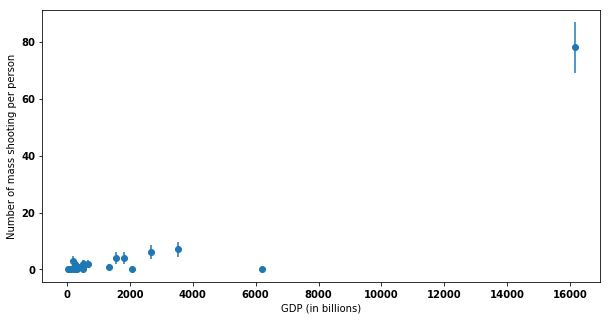

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [122]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [418]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_['shootingspp_err']

In [131]:
df_['avg_civ_fa_pp'] = df_["Average total all civilian firearms"] / df_['pop']
df_['avg_civ_fa_pp_err'] = 1.0 * np.sqrt(df_["Average total all civilian firearms"]) / df_['pop']
df_['avg_civ_fa_pp'], df_['avg_civ_fa_pp_err']

(0     0.134110
 1     0.296560
 2     0.161751
 3     0.286326
 4     0.116246
 5     0.443298
 6     0.289370
 7     0.310845
 8     0.226347
 9     0.056450
 10    0.280622
 11    0.078269
 12    0.117569
 13    0.005563
 14    0.131840
 15    0.209841
 16    0.278964
 17    0.013399
 18    0.085593
 19    0.096209
 20    0.294137
 21    0.425167
 22    0.859891
 Name: avg_civ_fa_pp, dtype: float64, 0     0.000077
 1     0.000188
 2     0.000121
 3     0.000091
 4     0.000144
 5     0.000286
 6     0.000066
 7     0.000062
 8     0.000143
 9     0.000075
 10    0.000935
 11    0.000130
 12    0.000044
 13    0.000007
 14    0.000498
 15    0.000218
 16    0.000236
 17    0.000019
 18    0.000090
 19    0.000045
 20    0.000176
 21    0.000231
 22    0.000052
 Name: avg_civ_fa_pp_err, dtype: float64)

#### Without Error

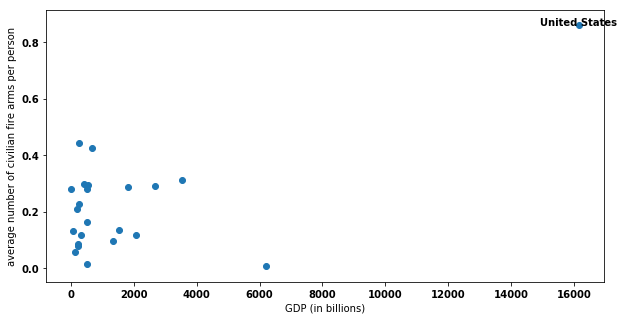

average number of civilian fire arms per person vs GDP, The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest average number of civilian fire arms per person


In [170]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_["avg_civ_fa_pp"])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per person")
[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_.gdp.iloc[i] / 1e9, df_['avg_civ_fa_pp'].iloc[i])
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]
ax.set_ylim()
pl.show()
print ("average number of civilian fire arms per person vs GDP, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest average number of civilian fire arms per person")


#### With Error

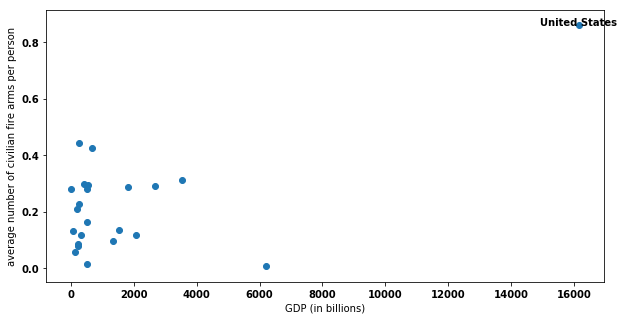

average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest average number of civilian fire arms per person


In [171]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_["avg_civ_fa_pp"])
ax.errorbar(df_.gdp / 1e9, df_['avg_civ_fa_pp'], 
            yerr = df_['avg_civ_fa_pp_err'] * 1.0, fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per person")
[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_.gdp.iloc[i] / 1e9, df_['avg_civ_fa_pp'].iloc[i])
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]

ax.set_ylim()
pl.show()
print ("average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest average number of civilian fire arms per person")


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

#### Histogram

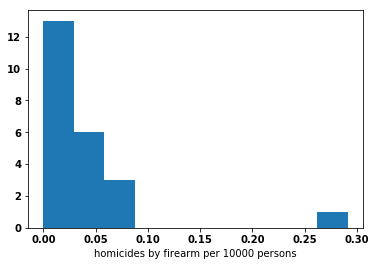

In [173]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1e4)
ax.set_xlabel('homicides by firearm per 10000 persons');


In [156]:
df_[df_['Country Name'] == 'United States'].index[0]

22

#### With Error

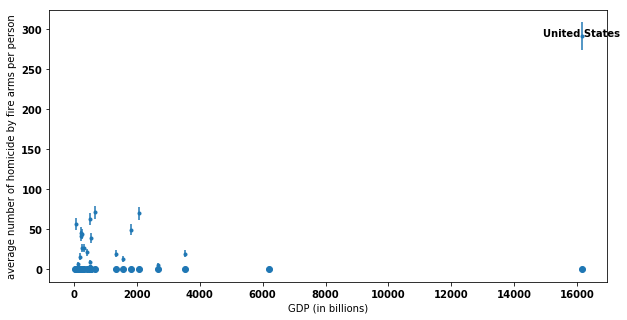

average number of homicide by fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the rightmost of the plot is the USA, which has the the highest GDP and the highest average number of civilian fire arms per person


In [175]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['hc_fa_pp'])
ax.errorbar(df_.gdp / 1e9, df_['hc_fa_pp']  * 1e4, 
            yerr = np.sqrt(df_['hc_fa_pp'] * 1e4), fmt = '.') # np.sqrt(1e2) 10.0

[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_.gdp.iloc[i] / 1e9, df_['hc_fa_pp'].iloc[i] * 1e4)
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of homicide by fire arms per person")
ax.set_ylim()
pl.show()
print ("average number of homicide by fire arms per 10000 persons vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the rightmost of the plot is the USA, " + 
       "which has the the highest GDP and the highest average number of civilian fire arms per person")


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


#### Without Error

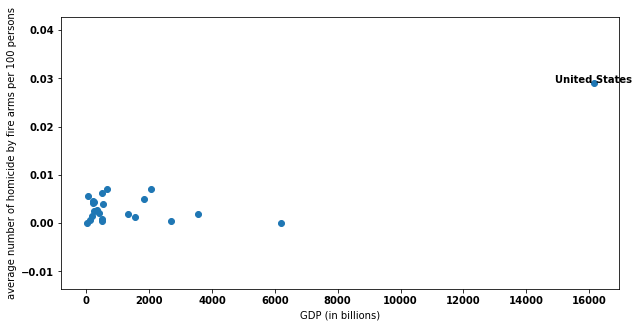

average number of homicide by fire arms per 100 persons vs GDP, The datapoint to the rightmost of the plot is the USA, which has the the highest GDP and the highest average number of civilian fire arms per person


In [169]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['hc_fa_pp'])

[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_.gdp.iloc[i] / 1e9, df_['hc_fa_pp'].iloc[i])
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of homicide by fire arms per 100 persons")
ax.set_ylim()
pl.show()
print ("average number of homicide by fire arms per 100 persons vs GDP, " + 
       "The datapoint to the rightmost of the plot is the USA, " + 
       "which has the the highest GDP and the highest average number of civilian fire arms per person")


#### With Error

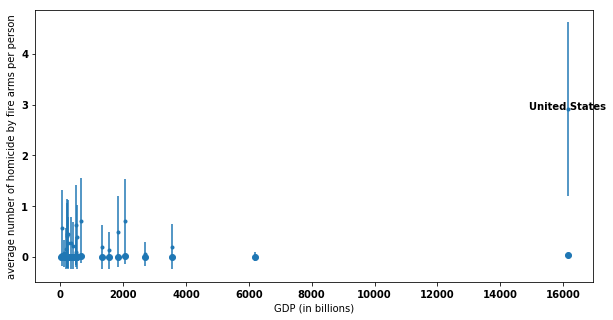

average number of homicide by fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the rightmost of the plot is the USA, which has the the highest GDP and the highest average number of civilian fire arms per person


In [164]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['hc_fa_pp'])
ax.errorbar(df_.gdp / 1e9, df_['hc_fa_pp']  * 1e2, 
            yerr = np.sqrt(df_['hc_fa_pp']) * 10.0, fmt = '.') # np.sqrt(1e2) 10.0

[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_.gdp.iloc[i] / 1e9, df_['hc_fa_pp'].iloc[i] * 1e2)
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of homicide by fire arms per person")
ax.set_ylim()
pl.show()
print ("average number of homicide by fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the rightmost of the plot is the USA, " + 
       "which has the the highest GDP and the highest average number of civilian fire arms per person")


## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


#### Without Error

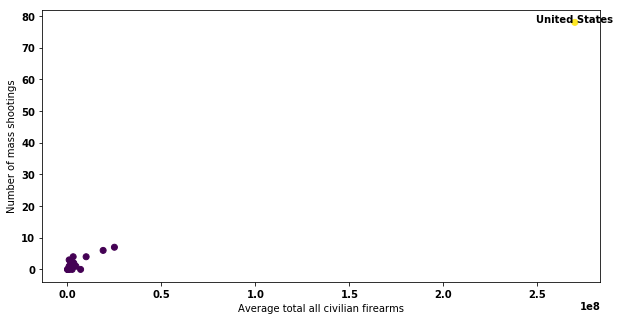

Number of mass shootings vs. Average total all civilian firearms, 


In [181]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
_c = pd.Series(np.zeros(df_.shape[0]))
_c.iloc[df_[df_['Country Name'] == 'United States'].index[0]] = 1

scatter = ax.scatter(
    df_['Average total all civilian firearms']
    , df_['Number of mass shootings']
    , c=_c
)
# ax.errorbar(
#     df_['Average total all civilian firearms']
#     , df_['Number of mass shootings']
#     , yerr = np.sqrt(df_['Number of mass shootings'])
#     , fmt = '.'
# )

[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_['Average total all civilian firearms'].iloc[i], df_['Number of mass shootings'].iloc[i])
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs. Average total all civilian firearms, ")


#### With Error

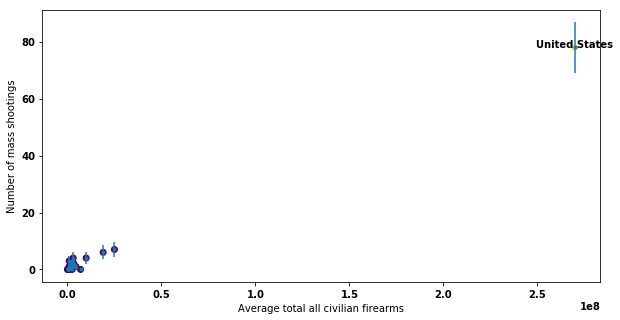

Number of mass shootings vs. Average total all civilian firearms, 


In [185]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
_c = pd.Series(np.zeros(df_.shape[0]))
_c.iloc[df_[df_['Country Name'] == 'United States'].index[0]] = 1

scatter = ax.scatter(
    df_['Average total all civilian firearms']
    , df_['Number of mass shootings']
    , c=_c
)
ax.errorbar(
    df_['Average total all civilian firearms']
    , df_['Number of mass shootings']
    , yerr = np.sqrt(df_['Number of mass shootings'])
    , fmt = '.'
)

[
    plt.annotate(
        s=df_['Country Name'].iloc[i]
        , xy=(df_['Average total all civilian firearms'].iloc[i], df_['Number of mass shootings'].iloc[i])
        , horizontalalignment='center'
    ) for i in range(df_.shape[0]) if i == df_[df_['Country Name'] == 'United States'].index[0]
]

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs. Average total all civilian firearms, ")


# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [213]:
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.regression.linear_model import WLS

#### Removing United States because it is an outlier

In [233]:
plot_data = df_[df_.index != (df_[df_['Country Name'] == 'United States'].index[0])]
plot_data = plot_data[['Average total all civilian firearms', 'Number of mass shootings']]
plot_data.rename(
    dict(
        zip(
            ['Average total all civilian firearms', 'Number of mass shootings']
            , ['avg_tot_civ_fa', 'no_mass_shooting']
        )
    )
    , axis=1
    , inplace=True
)


plot_data.head()

,avg_tot_civ_fa,no_mass_shooting
0,3050000.0,4
1,2500000.0,1
2,1800000.0,2
3,9950000.0,4
4,650000.0,0


#### statsmodel.OLS

In [234]:
res = smf.ols(formula='no_mass_shooting~avg_tot_civ_fa-1', data=plot_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       no_mass_shooting   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     79.69
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.36e-08
Time:                        11:27:02   Log-Likelihood:                -34.792
No. Observations:                  22   AIC:                             71.58
Df Residuals:                      21   BIC:                             72.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
avg_tot_civ_fa  3.091e-07   3.46e-08      8.927      0.000    2.37e-07    3.81e-07
==============================================================================
Omnibus:                        3.096   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.419
Skew:                           0.475   Prob(JB):                        0.492
Kurtosis:                       3.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
plot_data['pred_no_mass_shooting_ols'] = res.predict(plot_data['avg_tot_civ_fa']) 

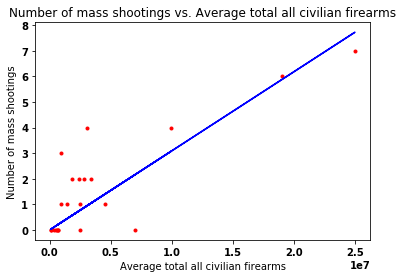


United States is removed from the data because it is an outlier, as exploration stage revealed.
Regression line is calculated with OLS method.
R-squared is 0.79



In [260]:
plt.plot(
    plot_data['avg_tot_civ_fa']
    , plot_data['no_mass_shooting']
    , '.r'
) #plot the data

plt.plot(
    plot_data['avg_tot_civ_fa']
    , plot_data['pred_no_mass_shooting_ols']
    , 'b'
) #plot the regression
ax = plt.gca()
ax.set_title("Number of mass shootings vs. Average total all civilian firearms")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
plt.show()
cmt = """
United States is removed from the data because it is an outlier, as exploration stage revealed.
Regression line is calculated with OLS method.
R-squared is 0.79
"""
print(cmt)

#### statsmodel.WLS

In [263]:
"""
It takes the parameter weights, which is the inverse of your errors: weights = 1.0/df.yerror 
Notice that a - sqrt(0) = 0 b - 1/0 = infinity c - 
you cannot have weight that are infinity in your fit. 
Please come up with a solution and justify it."""
_w = np.sqrt(plot_data['no_mass_shooting'].replace(0.0, 1e-9))
res = WLS(
    plot_data['no_mass_shooting']
    , plot_data['avg_tot_civ_fa']
    , weights=_w
    , missing='none'
    , hasconst=None
).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:       no_mass_shooting   R-squared:                       0.865
Model:                            WLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.39e-10
Time:                        11:43:42   Log-Likelihood:                -82.831
No. Observations:                  22   AIC:                             167.7
Df Residuals:                      21   BIC:                             168.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
avg_tot_civ_fa  3.149e-07   2.72e-08     11.586      0.000    2.58e-07    3.71e-07
==============================================================================
Omnibus:                       13.084   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.526
Skew:                           1.449   Prob(JB):                      0.00314
Kurtosis:                       5.044   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
plot_data['pred_no_mass_shooting_wls'] = res.predict(plot_data['avg_tot_civ_fa']) 

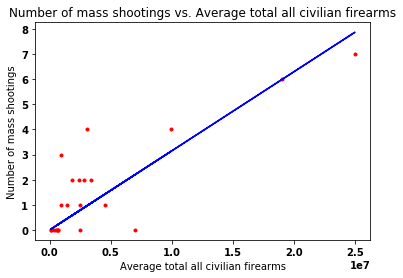


United States is removed from the data because it is an outlier, as exploration stage revealed.
Regression line is calculated with WLS method, where weighting is calculated using Poisson Error, square root of the value of dependent variable.
R-squared is 0.86, which is 7% improvement in explaining the total variance of data from OLS model.



In [265]:
plt.plot(
    plot_data['avg_tot_civ_fa']
    , plot_data['no_mass_shooting']
    , '.r'
) #plot the data

plt.plot(
    plot_data['avg_tot_civ_fa']
    , plot_data['pred_no_mass_shooting_wls']
    , 'b'
) #plot the regression
ax = plt.gca()
ax.set_title("Number of mass shootings vs. Average total all civilian firearms")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
plt.show()
cmt = """
United States is removed from the data because it is an outlier, as exploration stage revealed.
Regression line is calculated with WLS method, where weighting is calculated using Poisson Error, square root of the value of dependent variable.
R-squared is 0.86, which is 7% improvement in explaining the total variance of data from OLS model.
"""
print(cmt)

#### Seaborn Regplot

In [ ]:
sns.regplot(
    x=plot_data['avg_tot_civ_fa']
    , y=plot_data['no_mass_shooting']
    , marker='.'
    , data=plot_data
    , ci=95
)
ax = plt.gca()
ax.set_title("Number of mass shootings vs. Average total all civilian firearms")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
plt.show()
cmt = """
United States is removed from the data because it is an outlier, as exploration stage revealed.
Regression line is calculated with Seaborn Regplot method.
The blue region shows the confidence interval whose conditonal probability is P(Y|X=x)
"""
print(cmt)

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



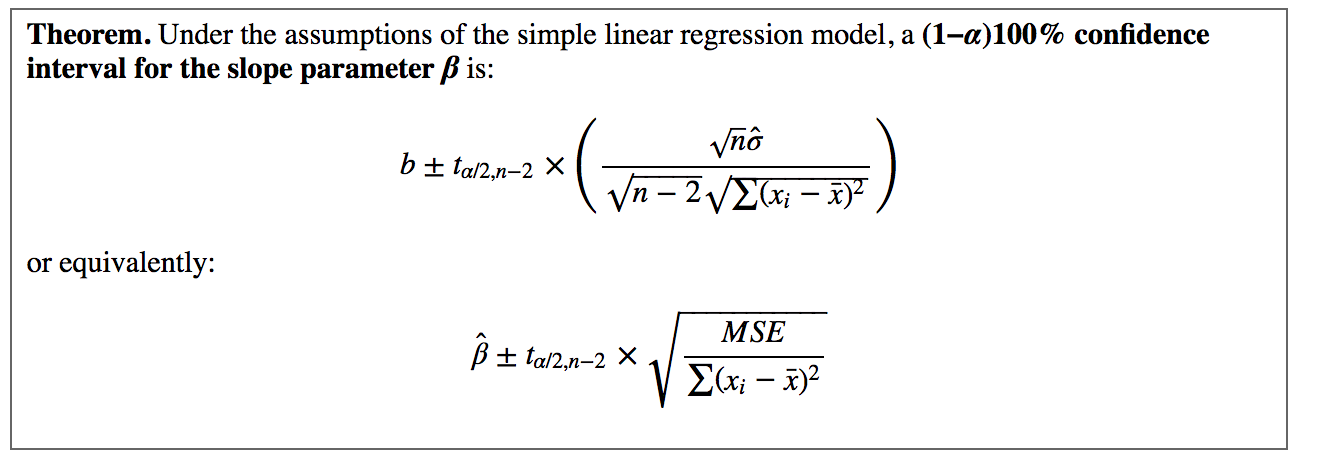

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

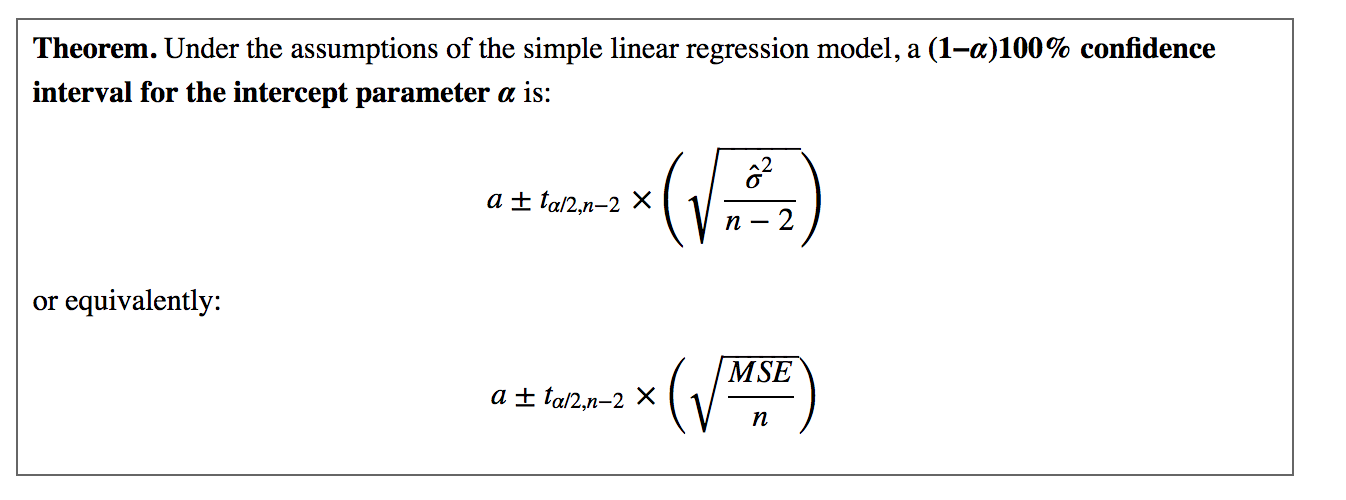

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

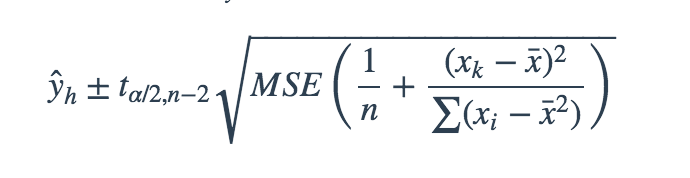

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

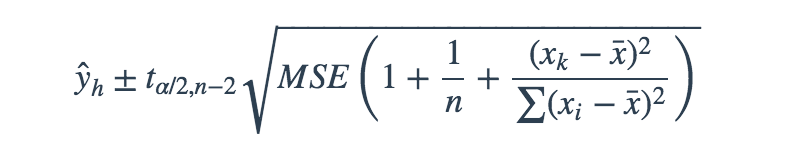

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

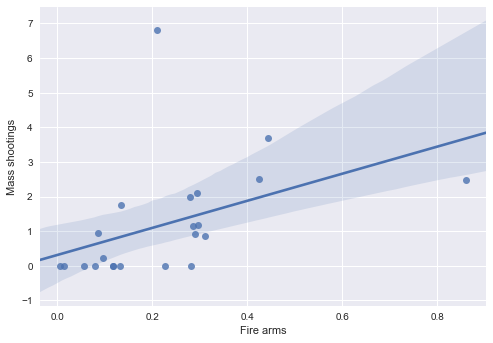

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

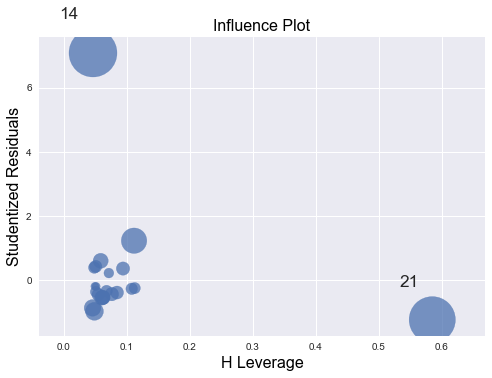

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings